# Classifier Evaluation : Decision Tree vs Naive Bayes


A program to implement Decision Tree and Naive Bayes Classifier and perform a classification task. 

        A template to generate data : as: Ɗ(x,y) where x is a 2 dimensional input → x =[x1, x2] ~ U(-1,1) x U(-1,1) and y = sign (x12 + x22 - 0.5) where U denotes Uniform Distribution.
I have generated an appropriate number of samples such that I was able to learn the classifier.
For each of the above classifiers, I have performed k-fold cross validation and plotted the train and test accuracy (y-axis) with varying ‘k’ (1<=k<=10) (x-axis). 

## Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
#Do all the necessary imports here

## Data generation

In [0]:
#This code generates random data from Uniform Distribution and assigns labels.
#The data is a non-linear one with points inside a circle of fixed radius marked as -1 and outside as +1.

def generate_data():

	np.random.seed(123) #Set seed for reproducibility. Please do not change/remove this line.
	x = np.random.uniform(-1,1,(128,2)) #You may change the number of samples you wish to generate
	y=[]
	for i in range(x.shape[0]):
		y.append(np.sign(x[i][0]**2 + x[i][1]**2 - 0.5)) #Forming labels
	return x,y



#We flip the labels of some data (here with 5% probability) to introduce some noise.
def flip_labels(y):

	num = int(0.05 * len(y)) #5% of data to be flipped
	np.random.seed(123)
	changeind = np.random.choice(len(y),num,replace=False) #Sampling without replacement
	#For example, np.random.choice(5,3) = ([0,2,3]); first argument is the limit till which we intend to pick up elements, second is the number of elements to be sampled

	#Creating a copy of the array to modify
	yc=np.copy(y) # yc=y is a bad practice since it points to the same location and changing y or yc would change the other which won't be desired always
	#Flip labels -1 --> 1 and 1 --> -1
	for i in changeind:
		if yc[i]==-1.0:
			yc[i]=1.0
		else:
			yc[i]=-1.0

	return yc

## Classifiers

I will be using Decision Tree and Naive Bayes Classifiers to classify the above generated data.


### Decision Tree

In [0]:
#Fill up the below function
def train_test_dt(x,y):
    samples=[]
    acc_train=[]
    acc_test=[]    
    results=[]
    
    for k in range(2,11):
        clf=tree.DecisionTreeClassifier()
        results=(cross_validate(clf, x, y, cv=k, return_train_score=True))
        acc_train.append(np.mean(results['train_score']))
        acc_test.append(np.mean(results['test_score']))
        samples.append(k)
    
    plt.plot(samples,acc_train,'bo-',label='Train Accuracy')
    plt.plot(samples,acc_test,'ro-',label='Test Accuracy')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Number of folds',fontsize=15)
    plt.ylabel('Mean Accuracy',fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Decision Tree',fontsize=15)
    axes = plt.gca()
    axes.set_ylim([0.4,1])
    plt.show()
    warnings.filterwarnings('ignore')        
    
    
	# Perform a k-fold cross validation using Decision Tree
	#Plot train and test accuracy with varying k (1<=k<=10)
    pass

### Naive Bayes

In [0]:
#Fill up the velow function
def train_test_nb(x,y):
    samples=[]
    acc_train=[]
    acc_test=[]    
    
    
    for k in range(2,11):
        clf=GaussianNB()
        results=(cross_validate(clf, x, y, cv=k, return_train_score=True))
        acc_train.append(np.mean(results['train_score']))
        acc_test.append(np.mean(results['test_score']))
        samples.append(k)
    
    plt.plot(samples,acc_train,'bo-',label='Train Accuracy')
    plt.plot(samples,acc_test,'ro-',label='Test Accuracy')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('Number of folds',fontsize=15)
    plt.ylabel('Mean Accuracy',fontsize=15)
    plt.legend(fontsize=15)
    plt.title('Naive Bayes Classifier',fontsize=15)
    axes = plt.gca()
    axes.set_ylim([0.4,1])
    plt.show()
    warnings.filterwarnings('ignore')
            
	# Perform a k-fold cross validation using Naive Bayes
	#Plot train and test accuracy with varying k (1<=k<=10)
    pass

### Evaluation

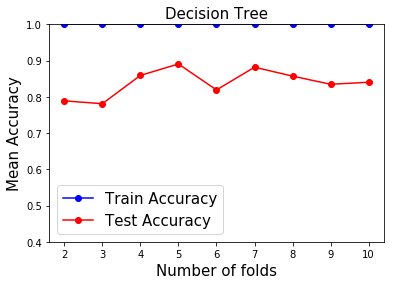

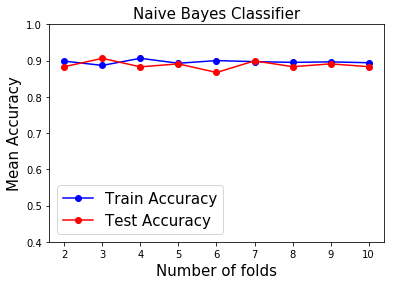

In [5]:
def main():

	x,y = generate_data() #Generate data
	y = flip_labels(y) #Flip labels
	y=np.asarray(y) #Change list to array
	train_test_dt(x,y)
	train_test_nb(x,y)
    


if __name__=='__main__':
	main()